In [5]:
os.getcwd()

'C:\\Users\\youngwoo\\data'

In [53]:
# %load include.py
#!/usr/bin/env python

# In[ ]:

import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#matplotlib.Params['font.family'] = 'Malgun Gothic'



In [54]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [55]:
import folium
folium.__version__

'0.12.1'

In [58]:
# df = pd.read_excel('./data/서울지역 대학교 위치.xlsx')

# seoul_map = folium.Map(location=[37,55,126,98], zoom_start=12)
# for name, lat, lng in zip(df.index, df.위도, df.경도):
#     folium.Marker([lat, lng],
#                   radius=10,
#                   color='brown',
#                   fill=True,
#                   fill_color='coral',
#                   fill_opacity=0.7,
#                   popup=name
#     ).add_to(seoul_map)

In [218]:
df = sns.load_dataset('titanic')


In [219]:
df.info()
df['deck'].value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [220]:
df['deck'].isnull()
# df['deck'].notnull()

df.isnull().sum(axis=0)
df.isnull().sum(axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [221]:
#age 컬럼의 Nan처리
#1. 제거방법
df_age = df.dropna(subset=['age'], how='any', axis=0)
print(len(df), len(df_age))
#2. 치환하는 방법 : 평균
mean_age = df['age'].fillna(df['age'].mean(axis=0))
mean_age.head(10)

891 714


0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [222]:
# table = df.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# sns.heatmap(table,
#            annot=True, fmt='d',
#            cmap='YlGnBu',
#            linewidth=.5,
#            cbar=False)
# plt.show()

In [223]:
print(df.head().notnull())

   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    True  True  True   True   True  True      True   True  True   
1      True    True  True  True   True   True  True      True   True  True   
2      True    True  True  True   True   True  True      True   True  True   
3      True    True  True  True   True   True  True      True   True  True   
4      True    True  True  True   True   True  True      True   True  True   

   adult_male   deck  embark_town  alive  alone  
0        True  False         True   True   True  
1        True   True         True   True   True  
2        True  False         True   True   True  
3        True   True         True   True   True  
4        True  False         True   True   True  


In [224]:
import numpy as np
np.floor(34.5)

34.0

In [225]:
#age 컬럼의 Nan 처리
#누락 데이터가 400개 이상인 컬럼을 삭제 >> 데이터 분석에 영향이 없는 컬럼
df_t = df.dropna(axis=1, thresh=400)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [226]:
df['thre'] = np.empty(len(df))

In [227]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,thre
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,4.940656e-324
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4.940656e-324
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,4.940656e-324
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,4.940656e-324
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,4.940656e-324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,4.940656e-324
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,4.940656e-324
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0.000000e+00
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,4.940656e-324


In [228]:
df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object

In [229]:
#1. 가장 많이 나오는 값으로 치환
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()
df_em = df['embark_town'].fillna(most_freq)
df_em[825:830]
df['embark_town'].fillna(most_freq, inplace=True)
#2. 앞 또는 뒤에 오는 값으로 치환
df['embark_town'].fillna(method='ffill')[825:831]
df['embark_town'].fillna(method='bfill')[825:831]




825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object

In [230]:
df['embark_town'].head(10)

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
5     Queenstown
6    Southampton
7    Southampton
8    Southampton
9      Cherbourg
Name: embark_town, dtype: object

In [231]:
df.isnull().sum(axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
thre             0
dtype: int64

In [232]:
df['embark_town'].unique()
df['embark_town'].value_counts(dropna=True).idxmax()

'Southampton'

In [233]:
#titanice 데이터를 로드해서 df에 저장한 후
df = sns.load_dataset('titanic')
#1. 각 자료의 Nan의 갯수를 확인
df.info() 
#2. Nan의 갯수가 전체 데이터의 반절이 넘으면 삭제
df.dropna(thresh=500, axis=1, inplace=True)
#3. Nan 데이터의 컬럼이 숫자인 경우 해당 컬럼의 최소값으로 Nan을 대체
df['age'].fillna(df['age'].min(), inplace=True)
df.head(10)
#4. Nan 데이터의 컬럼이 문자인 경우 해당 컬럼의 뒤에 오는 값으로 대체
df['embark_town'].fillna(method='bfill', inplace=True)
df[825:831]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
825,0,3,male,0.42,0,0,6.9500,Q,Third,man,True,Queenstown,no,True
826,0,3,male,0.42,0,0,56.4958,S,Third,man,True,Southampton,no,True
827,1,2,male,1.00,0,2,37.0042,C,Second,child,False,Cherbourg,yes,False
828,1,3,male,0.42,0,0,7.7500,Q,Third,man,True,Queenstown,yes,True
829,1,1,female,62.00,0,0,80.0000,NaN,First,woman,False,Cherbourg,yes,True
830,1,3,female,15.00,1,0,14.4542,C,Third,child,False,Cherbourg,yes,False


In [234]:
df_mpg= sns.load_dataset('mpg')
df_mpg.info()
df_mpg['horsepower'].fillna(df_mpg['horsepower'].mean(), inplace=True)
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float6

In [235]:
import pandas as pd

In [236]:
# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [237]:
df['c2'].duplicated() #컬럼의 중복값 확인
df.duplicated()   #인덱스별 중복값 확인


0    False
1     True
2    False
3    False
4    False
dtype: bool

In [238]:
#중복 제거
df2 = df.copy()
df2 = df2.drop_duplicates()
df2


,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [239]:
df3 = df.copy()
df3 = df3.drop_duplicates(subset=['c2','c3'])
df3

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


In [81]:
df_mpg = sns.load_dataset('mpg')
df_mpg.head(3)

#단위 환산 : 갤런 >>리터, 마일>>km로 단위 변환

mpg_to_kl= 1.60934/3.78541
df_mpg['kl'] = (df_mpg['mpg']*mpg_to_kl).round(2)
df_mpg.head(3)
df_mpg['kl'] = df_mpg['kl'].round()
df_mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kl
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,8.0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,8.0


In [82]:
#자료에 Nan 확인 >> nan 없애고 시작
df_mpg.dropna(subset=['horsepower'],axis=0, inplace=True)
df_mpg.info()

#자료형 변환
print(df_mpg['origin'].dtypes)  #object >> category로 데이터형을 변경
df_mpg['origin'] = df_mpg['origin'].astype('category')
print(df_mpg['origin'].dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
 9   kl            392 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 33.7+ KB
object
category


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   c1      5 non-null      object
 1   c2      5 non-null      int64 
 2   c3      5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [275]:
df_1 = pd.read_csv('./data/auto-mpg.csv')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   18.0                       397 non-null    float64
 1   8                          397 non-null    int64  
 2   307.0                      397 non-null    float64
 3   130.0                      397 non-null    object 
 4   3504.                      397 non-null    float64
 5   12.0                       397 non-null    float64
 6   70                         397 non-null    int64  
 7   1                          397 non-null    int64  
 8   chevrolet chevelle malibu  397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [276]:
df_1.columns = ['mpg','cylinders','displancement','horsepower','weight',
               'acceleration','model year','origin','name']

In [277]:
df_1['horsepower'].unique() #'?'>>제거, '?'>>Nan으로 변경
df_1['horsepower'].replace('?', np.nan, inplace=True) #'?'>>Nan
df_1.dropna(subset=['horsepower'], axis=0, inplace=True) #이상 데이터 삭제

In [278]:
#'?'>>Nan으로 변환
df_1['horsepower'].replace('?', np.nan, inplace=True)
df_1.dropna(subset=['horsepower'], axis=0, inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 396
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            391 non-null    float64
 1   cylinders      391 non-null    int64  
 2   displancement  391 non-null    float64
 3   horsepower     391 non-null    object 
 4   weight         391 non-null    float64
 5   acceleration   391 non-null    float64
 6   model year     391 non-null    int64  
 7   origin         391 non-null    int64  
 8   name           391 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.5+ KB


In [279]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    object  
 8   name          398 non-null    object  
 9   hp_bin        398 non-null    category
dtypes: category(1), float64(4), int64(3), object(2)
memory usage: 28.6+ KB


In [280]:
df_mpg['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [281]:
df_mpg['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [282]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    object  
 8   name          398 non-null    object  
 9   hp_bin        398 non-null    category
dtypes: category(1), float64(4), int64(3), object(2)
memory usage: 28.6+ KB


In [283]:
#dr_mpg.info()
#1.결측치 처리
#2.데이터 타입 변경 >> object >> float, 범주형 object <<category
#3.단위환산
#4.연속적인 데이터 >> 범주형 데이터로 변환

cut, hp_bin_div = np.histogram(df_mpg['horsepower'], bins=3)
hp_bin_div
bin_names = ['저출력', '보통출력', '고출력']
df_mpg['hp_bin'] = pd.cut(x=df_mpg['horsepower'],   #데이터 배열
                         bins=hp_bin_div,           #경계값 리스트
                         labels=bin_names,          #bin 이름
                         include_lowest=True       #첫 경계값 포함
                         )
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,보통출력
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,보통출력
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,보통출력
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,보통출력
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,보통출력


In [284]:
df_mpg['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [264]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,보통출력
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,보통출력
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,보통출력
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,보통출력
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,보통출력


In [287]:
cnt, hp_bin_div = np.histogram(df_mpg['horsepower'], bins=4) 
hp_bin_div
# cnt

array([ 46.,  92., 138., 184., 230.])

In [288]:
bin_names = ['저출력', '보통출력', '고출력']

df_mpg['hp_bin'] = pd.cut(x=df_mpg['horsepower'],   # 데이터 배열
                          bins=hp_bin_div,     # 경계값 리스트
                          labels=bin_names,    # bin 이름
                          include_lowest=True  # 첫 경계값 포함
                         )
df_mpg.head()

ValueError: Bin labels must be one fewer than the number of bin edges

In [289]:
df_1.head()
# df_1의 horsepower의 bin의 갯수를 4개로
cnt, bin_list = np.histogram(df_1['horsepower'], bins=4)
# bin의 이름을 ['low','modium', 'hight', 'very height']
df_1['hp_bin'] = pd.cut(x=df_1['horsepower'],
                       bins=bin_list,
                       labels=['low','modium', 'hight', 'very height'],
                       include_lowest=True)
df_1[['horsepower','hp_bin']]

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [290]:
pd.getdummies(df_mpg['hp_bin'])

AttributeError: module 'pandas' has no attribute 'getdummies'

In [291]:
#sklearn 패키지의 preproceing 모듈의 원 핫 인코딩
from sklearn import preprocessing


In [292]:
#전처리를 위한 encoder객체 생성
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

onehot_labeled = label_encoder.fit_transform(df_1['hp_bin'])
onehot_labled[:10]

#2차원 배열
onehot_reshaped = onehot_labled.reshape(len(onehot_labled),1)
onehot_reshaped

#희소행렬로 변환
onehot_fitted = onehot_encoder.fit.
print(type(onehoy_fitted))
print(onehot_fitted)

SyntaxError: invalid syntax (<ipython-input-292-639a97a9f014>, line 13)

In [293]:
#데이타 전처리 작업에서 
#1. 결측치 처리
#2. 데이터형 변환
#3. 범주형으로 변경 (구간분할, np.histogram(), pd.cut())
#4. 원핫 인코딩(더미변수, sklearn.preprocessing)
#5. 정규화

In [294]:
df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displancement','horsepower','weight',
               'acceleration','model year','origin','name']

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

print(df.horsepower.describe())
print('\n')
df.horsepower = df.horsepower / abs(df.horsepower.max())
print(df.horsepower.head())
print('\n')
print(df.horsepower.describe())
                 

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64


0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64


count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64


In [295]:
df = pd.read_csv('./data/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [296]:
#Date의 자료 타임이 object >> datetime 형식으로 변경
df['New_Date'] = pd.to_datetime(df['Date'])
df.head()
df.info()
#인덱스 설정 New_Date 컬럼으로
df.set_index('New_Date', inplace=True)
df.head() #확인 후 Date 컬럼 삭제
df.drop('Date', axis=1, inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   New_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


,Close,Start,High,Low,Volume
New_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [297]:
df.reset_index(inplace=True)
df['New_Date'].dt.year[0]
df['New_Date'].dt.month[0]
df['New_Date'].dt.day[0]

2

In [298]:
df.drop[('level_0','index'), axis=1, inplace=True]
df.head()

SyntaxError: invalid syntax (<ipython-input-298-2d74e4b6a055>, line 1)

In [299]:
####문제
#stock-data를 파일에서 읽어 DataFrame으로 저장
df = pd.read_csv('./data/stock-data.csv')
#Date 컬럼을 Datetime으로 형 변경
df.head()
df.rename(columns={'Date':'Datetime'})


,Datetime,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [300]:
#date 컬럼을 인덱스로 설정
df = df.set_index('Date')
print(df)


            Close  Start   High    Low  Volume
Date                                          
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039
2018-06-25  11150  11400  11450  11000   55519
2018-06-22  11300  11250  11450  10750  134805
2018-06-21  11200  11350  11750  11200  133002
2018-06-20  11550  11200  11600  10900  308596
2018-06-19  11300  11850  11950  11300  180656
2018-06-18  12000  13400  13400  12000  309787
2018-06-15  13400  13600  13600  12900  201376
2018-06-14  13450  13200  13700  13150  347451
2018-06-12  13200  12200  13300  12050  558148
2018-06-11  11950  12000  12250  11950   62293
2018-06-08  11950  11950  12200  11800   59258
2018-06-07  11950  12200  12300  11900   49088
2018-06-05  12150  11800  12250  11800   42485
2018-06-04  11900  11900  12200  11700   25171
2018-06-01  1

In [301]:
df.head()

,Close,Start,High,Low,Volume
Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


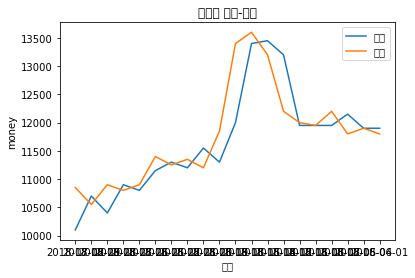

In [302]:
fig= plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['Close'], label='종가')
ax.plot(df['Start'], label='시가')

ax.set_title('일자별 시가-종가')
ax.set_xlabel('일자')
ax.set_ylabel('money')

ax.legend(loc='best')

plt.show()